# import packages

In [1]:
import traceback
import os
root_dir = os.getcwd()
import sys
sys.path.append(root_dir)
import mlearn
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

/Users/xuhao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/xuhao/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor,XGBClassifier

# 全局参数配置

In [ ]:
test_path = '/Users/muzhen/dev/flow_0/datasource/ds_out.csv'
test_path = '/Users/muzhen/repo/mlearn/mlearndev/data/chaintest_data.csv'
test_path = '/Users/muzhen/repo/mlearn/mlearn/data/post_model_test.pkl'
params = mlearn.set_params(test_path=test_path, app_f=True, optimizer_f=False, sampler_f=False)

In [3]:
df1 = pd.read_pickle('/home/muzhen/Downloads/20190118_df1.pkl')
df2 = pd.read_pickle('/home/muzhen/Downloads/20190118_df2.pkl')

In [6]:
df1.columns

Index(['account_reg_time', 'age', 'channel_name_1', 'fbi_score', 'hdshu_score',
       'id_first_2', 'individual_gender', 'jxl_c1m_equal_0', 'jxl_cic_equal_0',
       'jxl_cic_gre_0_ratio', 'jxl_coc_gre_0_ratio',
       'jxl_contact_call_len_then_equal_1_ratio',
       'jxl_contact_phone_1_num_ratio', 'jxl_phone_diffdate',
       'nifa_share_loanamt', 'nifa_share_loanbal', 'nifa_share_loancount',
       'nifa_share_outstandcount', 'nifa_share_overduecount',
       'nifa_share_overduemorecount', 'operator_month_use', 'prea_v5_fico',
       'realtime_i011', 'realtime_i031', 'realtime_j005', 'realtime_j174',
       'realtime_j240', 'umeng_score_small',
       'user_gray_contacts_gray_score_be_mean',
       'user_gray_contacts_gray_score_be_min',
       'user_gray_contacts_gray_score_min',
       'user_gray_contacts_gray_score_most_familiar_all',
       'user_gray_contacts_gray_score_most_familiar_be_all',
       'user_gray_contacts_gray_score_most_familiar_be_applied',
       'user_gray_c

In [2]:
test_path = os.path.join(root_dir, 'mlearn/data/xk_v4_data.pkl')
# test_path = '/Users/muzhen/repo/mlearn/mlearn/data/old_blind_data.pkl'
# test_path = '/Users/muzhen/repo/mlearn/mlearn/data/post_xk_25split.pkl'
label = '14d'
label_col = 'overdue_days'
dst = os.path.join(root_dir, 'mlearn/flow')


params = {'filter': {'ds': {'label': {'name': label, 'type': 'number'},
                            'test': os.path.join(dst, 'transformer/test/transformer_result.pkl'),
                            'train': os.path.join(dst, 'transformer/train/transformer_result.pkl')},
                     'out': {'dst': os.path.join(dst, 'filter')},
                     'st': [{'method': 'StableFilter',
                             'params': {'indice_name': 'psi', 'indice_thr': 0.2}},
                            {'method': 'SelectFromModelFilter',
                             'params': {
                                 'n_features_to_select': 60,
                                 'estimator': {
                                     'method': 'LogisticRegression',
                                     "params": {}}}}]},
          'optimizer': {'ds': {'label': {'name': label, 'type': 'number'},
                               'test': os.path.join(dst, 'filter/test/filter_result.pkl'),
                               'train': os.path.join(dst, 'filter/train/filter_result.pkl')},
                        'out': {'dst': os.path.join(dst, 'optimizer')},
                        'st': {'n_folds': 0,
                               'opt_encoder': {
                                   'method': 'BayesianOptimizer',
                                   'params': {'acq': 'ucb',
                                              'alpha': 0.0001,
                                              'init_points': 1,
                                              'kappa': 2.576,
                                              'n_iter': 1}},
                               'estimator': {
                                   'method': 'XGBClassifier',
                                   'params': {'gamma': [0, 1],
                                              'learning_rate': [0.001, 0.8],
                                              'max_depth': [2, 8],
                                              'n_estimators': [100, 2000],
                                              'reg_lambda': [0, 40]}},
                               'score_func': 'roc_auc',
                               'test_size': 0.2}},
          'sampler': {'ds': {'label': {'name': label, 'type': 'number'},
                             'table': test_path,
                             'test': None,
                             'train': None},
                      'out': {'dst': os.path.join(dst, 'sampler')},
                      'st': {'base_df': None,
                             'base_df_key': 'level',
                             'get_group_data': None,
                             'group_key': 'level',
                             'group_key_level': True,
                             'group_num': 10,
                             'group_ratio': {'ratio': {0: 0.1, 1: 0.2, 2: 0.5, 3: 0.2}},
                             'sort_values': 'apply_risk_created_at',
                             'thr': 0.5}},
          'spliter': {'ds': {'label': {'name': label, 'type': 'number'},
                             'table': test_path,
                             'test': None,
                             'train': None},
                      'out': {'dst': os.path.join(dst, 'spliter')},
                      'st': {'group_key': None,
                             'index_col': 'apply_risk_id',
                             'label_col': label_col,
                             'method': 'oot',
                             'random_state': 7,
                             'test_size': 0.25,
                             'time_col': 'apply_risk_created_at'}},
          'trainer': {'ds': {'label': {'name': label, 'type': 'number'},
                             'test': os.path.join(dst, 'filter/test/filter_result.pkl'),
                             'train': os.path.join(dst, 'filter/train/filter_result.pkl')},
                      'out': {'dst': os.path.join(dst, 'trainer')},
                      'st': {'n_folds': 5,
                             'oversample': False,
                             #                              'estimator': {
                             #                                  'method': 'XGBClassifier',
                             #                                  'params': {'base_score': 0.5,
                             #                                             'booster': 'gbtree',
                             #                                             'colsample_bylevel': 0.8,
                             #                                             'colsample_bytree': 0.8,
                             #                                             'early_stopping_rounds': 300,
                             #                                             'eval_metric': 'auc',
                             #                                             'gamma': 0.5,
                             #                                             'learning_rate': 0.1,
                             #                                             'max_delta_step': 0,
                             #                                             'max_depth': 3,
                             #                                             'min_child_weight': 10,
                             #                                             'n_estimators': 1000,
                             #                                             'n_jobs': 1,
                             #                                             'objective': 'binary:logistic',
                             #                                             'random_state': 0,
                             #                                             'reg_alpha': 1,
                             #                                             'reg_lambda': 20,
                             #                                             'scale_pos_weight': 1,
                             #                                             'silent': True,
                             #                                             'subsample': 0.7,
                             #                                             'verbose': False}},
                             "estimator": {
                                 "method": "SkopeRuler",
                                 "params": {'random_state': 7,
                                            'precision_min': 0.1,
                                            'recall_min': 0.05}},
                             'random_state': 7,
                             'reweight': False,
                             'reweight_with_label': False,
                             'cut_off_use_weights': True,
                                 'cut_off_sample_ratio': 1,
                                 'shift_thr': 0.1,
                                 'test_size': 0,
                                 'verbose': True}},
          'transformer': {'ds': {'label': {'name': label, 'type': 'number'},
                                 'test': os.path.join(dst, 'spliter/test/spliter_result.pkl'),
                                 'train': os.path.join(dst, 'spliter/train/spliter_result.pkl')},
                          'out': {'dst': os.path.join(dst, 'transformer')},
                          'st': {'cate': [{'cols': [],
                                           'encoders': [{'method': 'BaseEncoder',
                                                         'params': {'cate_thr': 0.5, 'missing_thr': 0.8, 'same_thr': 0.9}},
                                                        {'method': 'BinningWOEEncoder',
                                                         'params': {}},
                                                        #       {'method': 'CateOneHotEncoder',
                                                        #        'params': {}}
                                                        ]}],
                                 'cont': [{'cols': [],
                                           'encoders': [{'method': 'BaseEncoder',
                                                         'params': {'cate_thr': 0.5, 'missing_thr': 0.8, 'same_thr': 0.9}},
                                                        {'method': 'BinningWOEEncoder',
                                                         'params': {}},
                                                        #       {'method': 'CateOneHotEncoder',
                                                        #        'params': {}}
                                                        ]}],
                                 'method': 'auto',
                                 'params': {'thr': 5},
                                 'verbose': True}}}

# 全局测试

>>>>>>>>>>>>>>>>>>>>>>>>>> start spliter


/Users/muzhen/repo/mlearn/mlearn/service/reporter/feature_evaluation.py:248: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while missing in tmp[c].values:
/Users/muzhen/repo/mlearn/mlearn/service/transformer/category_encoding.py:224: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if missing in x:
/Users/muzhen/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/muzhen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values

Traceback (most recent call last):
  File "/Users/muzhen/repo/mlearn/mlearn/service/monitor/data_monitor.py", line 158, in consistent_dataset_test
    mcc, weights = detect_covariate_shift(df1, df2, report_dst)
  File "/Users/muzhen/repo/mlearn/mlearn/service/monitor/data_monitor.py", line 89, in detect_covariate_shift
    clf, df_cv, df_test, df_val, df_train, mcc, sample_weights = enc.fit(df, y_col)
  File "/Users/muzhen/repo/mlearn/mlearn/service/trainer/model_trainer.py", line 62, in fit
    self.report_dst)
  File "/Users/muzhen/repo/mlearn/mlearn/service/trainer/cv_trainer.py", line 200, in base_model_evaluation
    early_stopping_rounds=early_stopping_rounds, verbose=cv_verbose_eval, sample_weight=tra_w)
  File "/Users/muzhen/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py", line 500, in fit
    for i in range(len(eval_set))
  File "/Users/muzhen/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py", line 500, in <genexpr>
    for i in range(len(eval_set))
  File "/

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x1c1ab857b8>>
Traceback (most recent call last):
  File "/Users/muzhen/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


>>>>>>>>>>>>>>>>>>>>>>>>>> start transformer
start---- Index(['paydayloanlevelonechannelname', 'individual_gender',
       'consumer_label_if_own_cc', 'consumer_label_if_pay_ins', 'equipmentos',
       'ym_large_code', 'ym_small_code', 'province', 'user_gray_has_report'],
      dtype='object')
BaseEncoder
start---- Index(['paydayloanlevelonechannelname', 'individual_gender',
       'consumer_label_if_own_cc', 'consumer_label_if_pay_ins', 'equipmentos',
       'ym_large_code', 'ym_small_code', 'province', 'user_gray_has_report'],
      dtype='object')
BinningWOEEncoder


/Users/muzhen/repo/mlearn/mlearn/service/transformer/category_encoding.py:224: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if missing in x:


start---- Index(['baidu_panshi_prea_score', 'cn_gt_0', 'cn_gt_0_ratio', 'coc_eq_0',
       'coc_gt_0', 'coc_gt_0_ratio', 'fbi_score', 'hds_score', 'i011', 'i012',
       'i013', 'i031', 'xscore', 'xy_score', 'ym_large_score',
       'ym_small_score'],
      dtype='object')
BaseEncoder
start---- Index(['baidu_panshi_prea_score', 'cn_gt_0', 'cn_gt_0_ratio', 'coc_eq_0',
       'coc_gt_0', 'coc_gt_0_ratio', 'fbi_score', 'hds_score', 'i011', 'i013',
       'i031', 'xscore', 'xy_score', 'ym_large_score', 'ym_small_score'],
      dtype='object')
BinningWOEEncoder
start---- Index(['paydayloanlevelonechannelname', 'individual_gender',
       'consumer_label_if_own_cc', 'consumer_label_if_pay_ins', 'equipmentos',
       'ym_large_code', 'ym_small_code', 'province', 'user_gray_has_report'],
      dtype='object')
BaseEncoder
start---- Index(['paydayloanlevelonechannelname', 'individual_gender',
       'consumer_label_if_own_cc', 'consumer_label_if_pay_ins', 'equipmentos',
       'ym_large_code', '

/Users/muzhen/repo/mlearn/mlearn/service/reporter/feature_evaluation.py:248: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while missing in tmp[c].values:
/Users/muzhen/repo/mlearn/mlearn/service/transformer/category_encoding.py:224: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if missing in x:
/Users/muzhen/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


best_iteration:  2
{'train_auc': 0.96769549108962249, 'val_auc': 0.96859170370370373}
best_iteration:  107
{'train_auc': 0.97569927012707924, 'val_auc': 0.96806340740740748}
best_iteration:  64
{'train_auc': 0.97181138157163494, 'val_auc': 0.97287703703703698}
best_iteration:  70
{'train_auc': 0.97382962839465004, 'val_auc': 0.96742251851851857}
best_iteration:  184
{'train_auc': 0.9783101111111111, 'val_auc': 0.9682610888592198}
[0]	validation_0-auc:0.64254	validation_1-auc:0.64254
[1]	validation_0-auc:0.753492	validation_1-auc:0.753492
[2]	validation_0-auc:0.96791	validation_1-auc:0.96791
[3]	validation_0-auc:0.968338	validation_1-auc:0.968338
[4]	validation_0-auc:0.96862	validation_1-auc:0.96862
[5]	validation_0-auc:0.967661	validation_1-auc:0.967661
[6]	validation_0-auc:0.965605	validation_1-auc:0.965605
[7]	validation_0-auc:0.965119	validation_1-auc:0.965119
[8]	validation_0-auc:0.965666	validation_1-auc:0.965666
[9]	validation_0-auc:0.96743	validation_1-auc:0.96743
[10]	validatio

/Users/muzhen/repo/mlearn/mlearn/service/reporter/feature_evaluation.py:248: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while missing in tmp[c].values:
/Users/muzhen/repo/mlearn/mlearn/service/transformer/category_encoding.py:224: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if missing in x:
/Users/muzhen/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


best_iteration:  233
{'train_auc': 0.76076110555370313, 'val_auc': 0.69426133333333329}
best_iteration:  104
{'train_auc': 0.72985634100255647, 'val_auc': 0.71536029629629627}
best_iteration:  45
{'train_auc': 0.72882197769626922, 'val_auc': 0.69775466666666663}
best_iteration:  103
{'train_auc': 0.73572238894446285, 'val_auc': 0.71505185185185183}
best_iteration:  107
{'train_auc': 0.73719688888888879, 'val_auc': 0.69735054146269104}
[0]	validation_0-auc:0.65213	validation_1-auc:0.65213
[1]	validation_0-auc:0.655634	validation_1-auc:0.655634
[2]	validation_0-auc:0.657257	validation_1-auc:0.657257
[3]	validation_0-auc:0.660312	validation_1-auc:0.660312
[4]	validation_0-auc:0.669472	validation_1-auc:0.669472
[5]	validation_0-auc:0.671603	validation_1-auc:0.671603
[6]	validation_0-auc:0.674426	validation_1-auc:0.674426
[7]	validation_0-auc:0.675648	validation_1-auc:0.675648
[8]	validation_0-auc:0.679276	validation_1-auc:0.679276
[9]	validation_0-auc:0.682462	validation_1-auc:0.682462
[10

/Users/muzhen/repo/mlearn/mlearn/service/reporter/visualize.py:645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  final_df['count'] = tmp.sum()['count'].tolist()
/Users/muzhen/repo/mlearn/mlearn/service/reporter/visualize.py:649: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  final_df['acc_overdue_rate'] = acc_overdue['y_true'] / acc_overdue['count']


'{"code": 1, "msg": "succ", "result": {"ds": {"train": "/Users/muzhen/repo/mlearn/mlearn/flow/trainer/train/result", "test": "/Users/muzhen/repo/mlearn/mlearn/flow/trainer/test/trainer_result.pkl"}, "meta": "/Users/muzhen/repo/mlearn/mlearn/flow/trainer/train/trainer_enc.pkl", "report": "/Users/muzhen/repo/mlearn/mlearn/flow/trainer/report"}}'

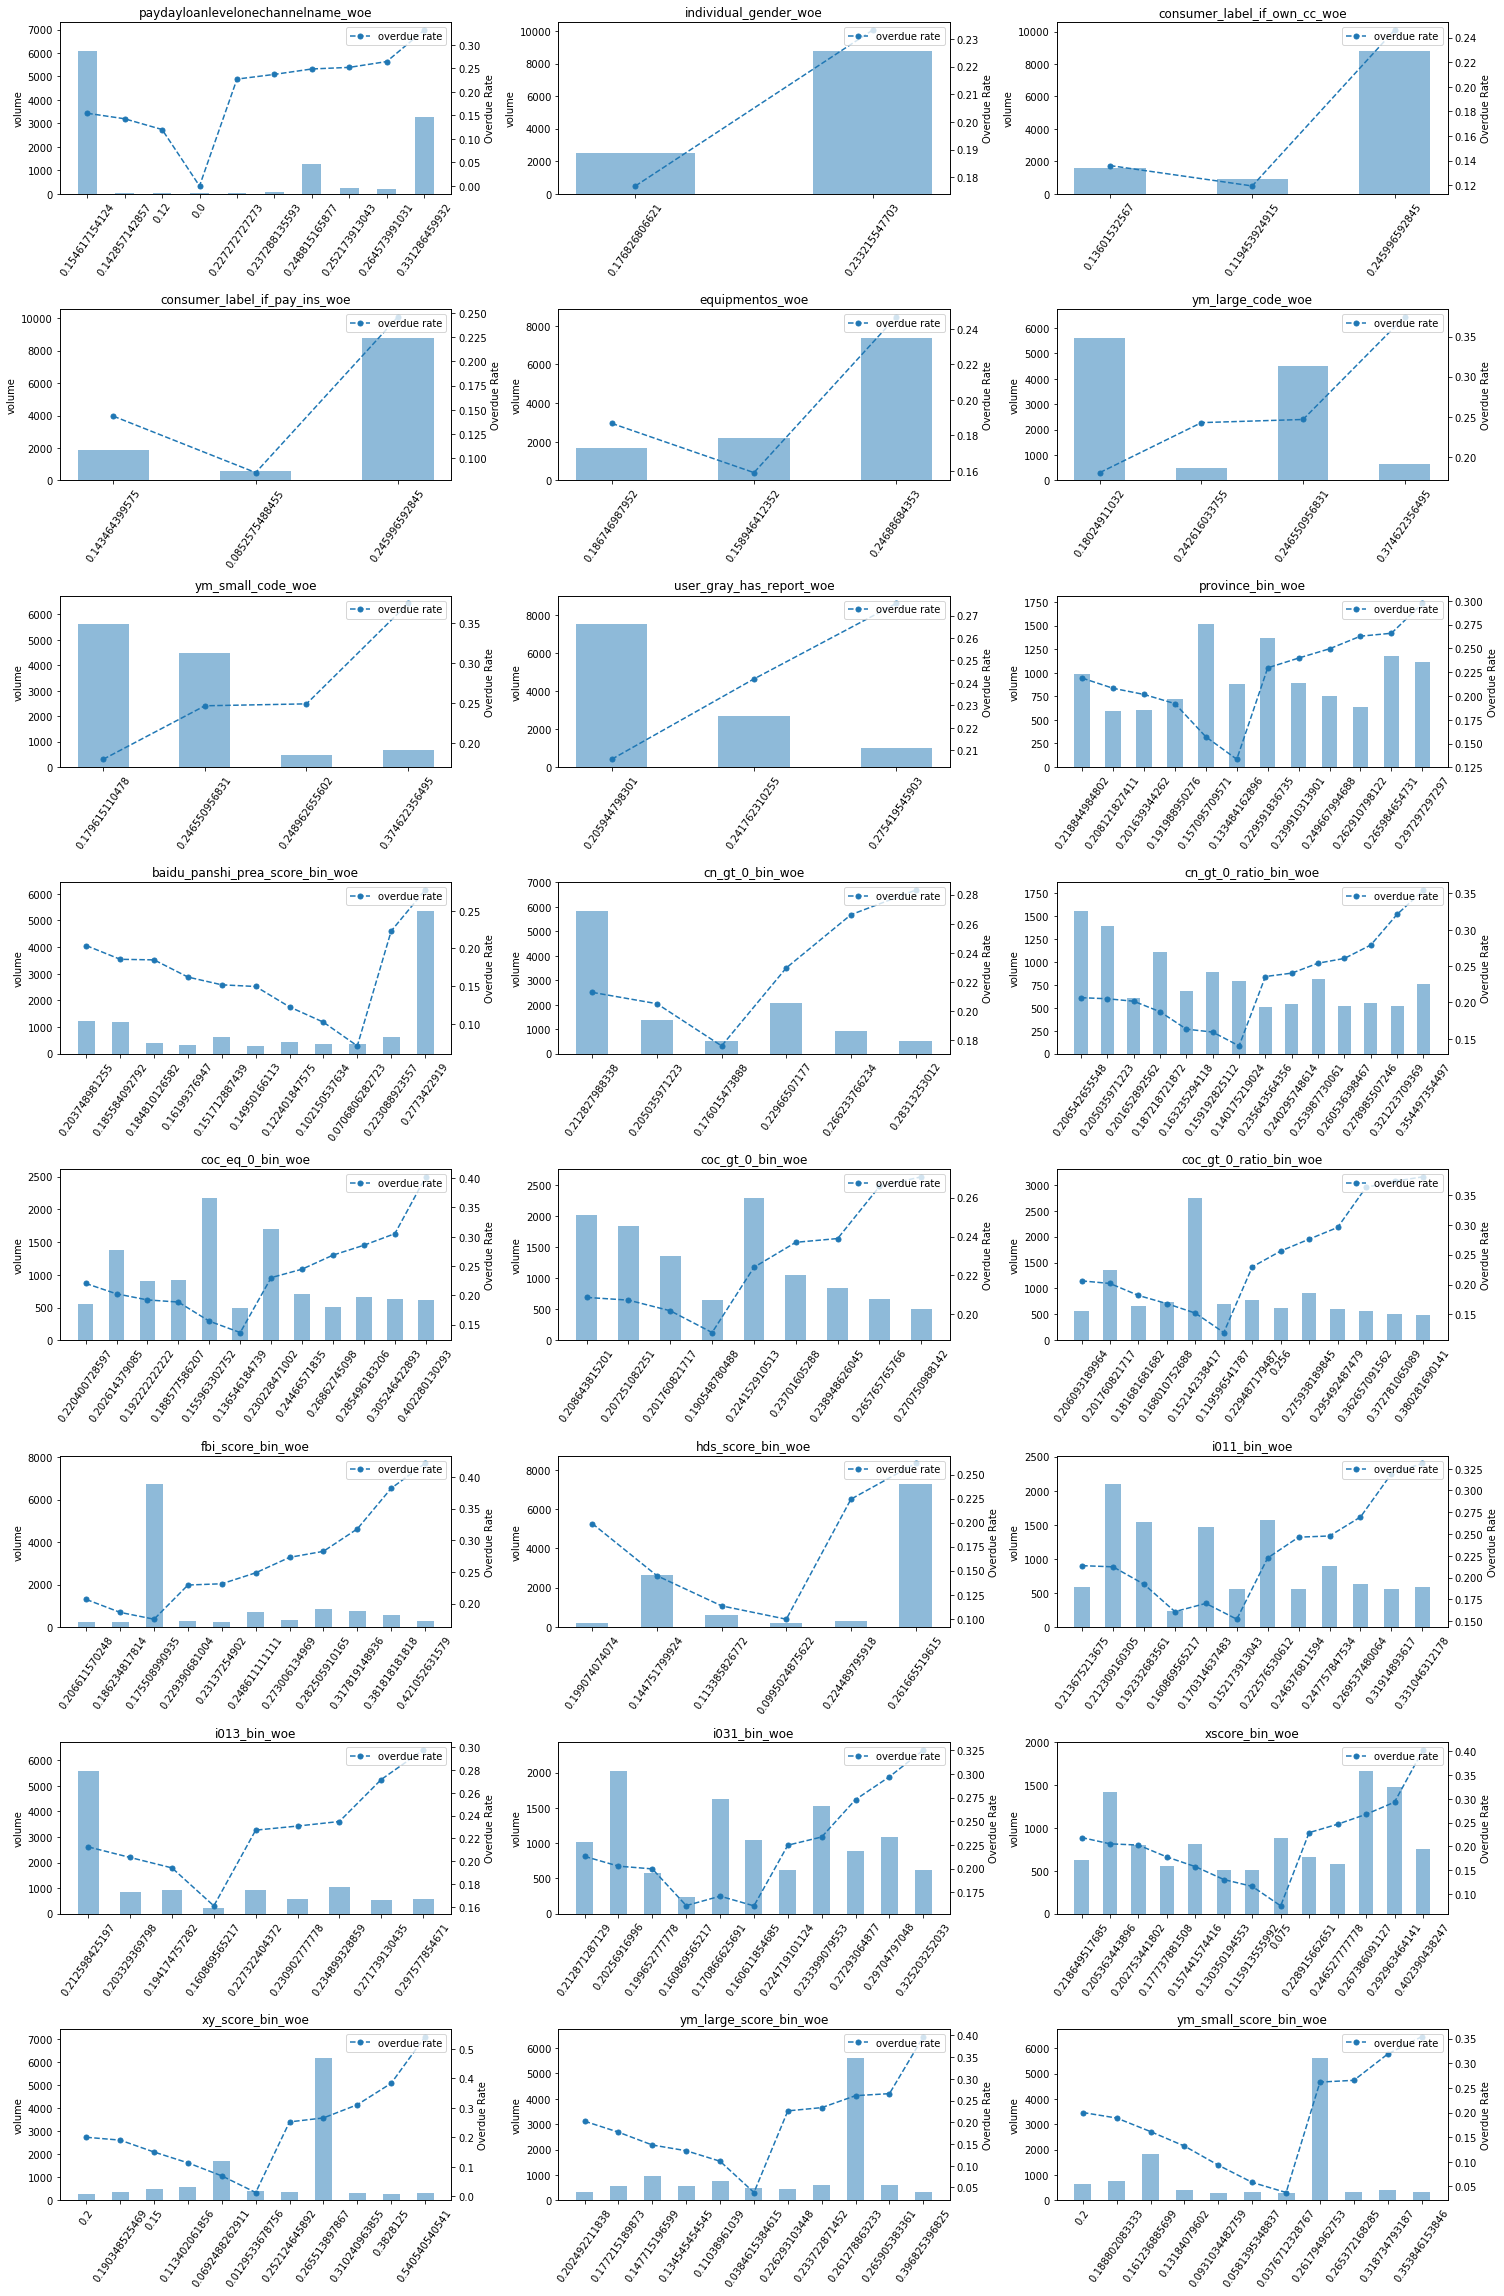

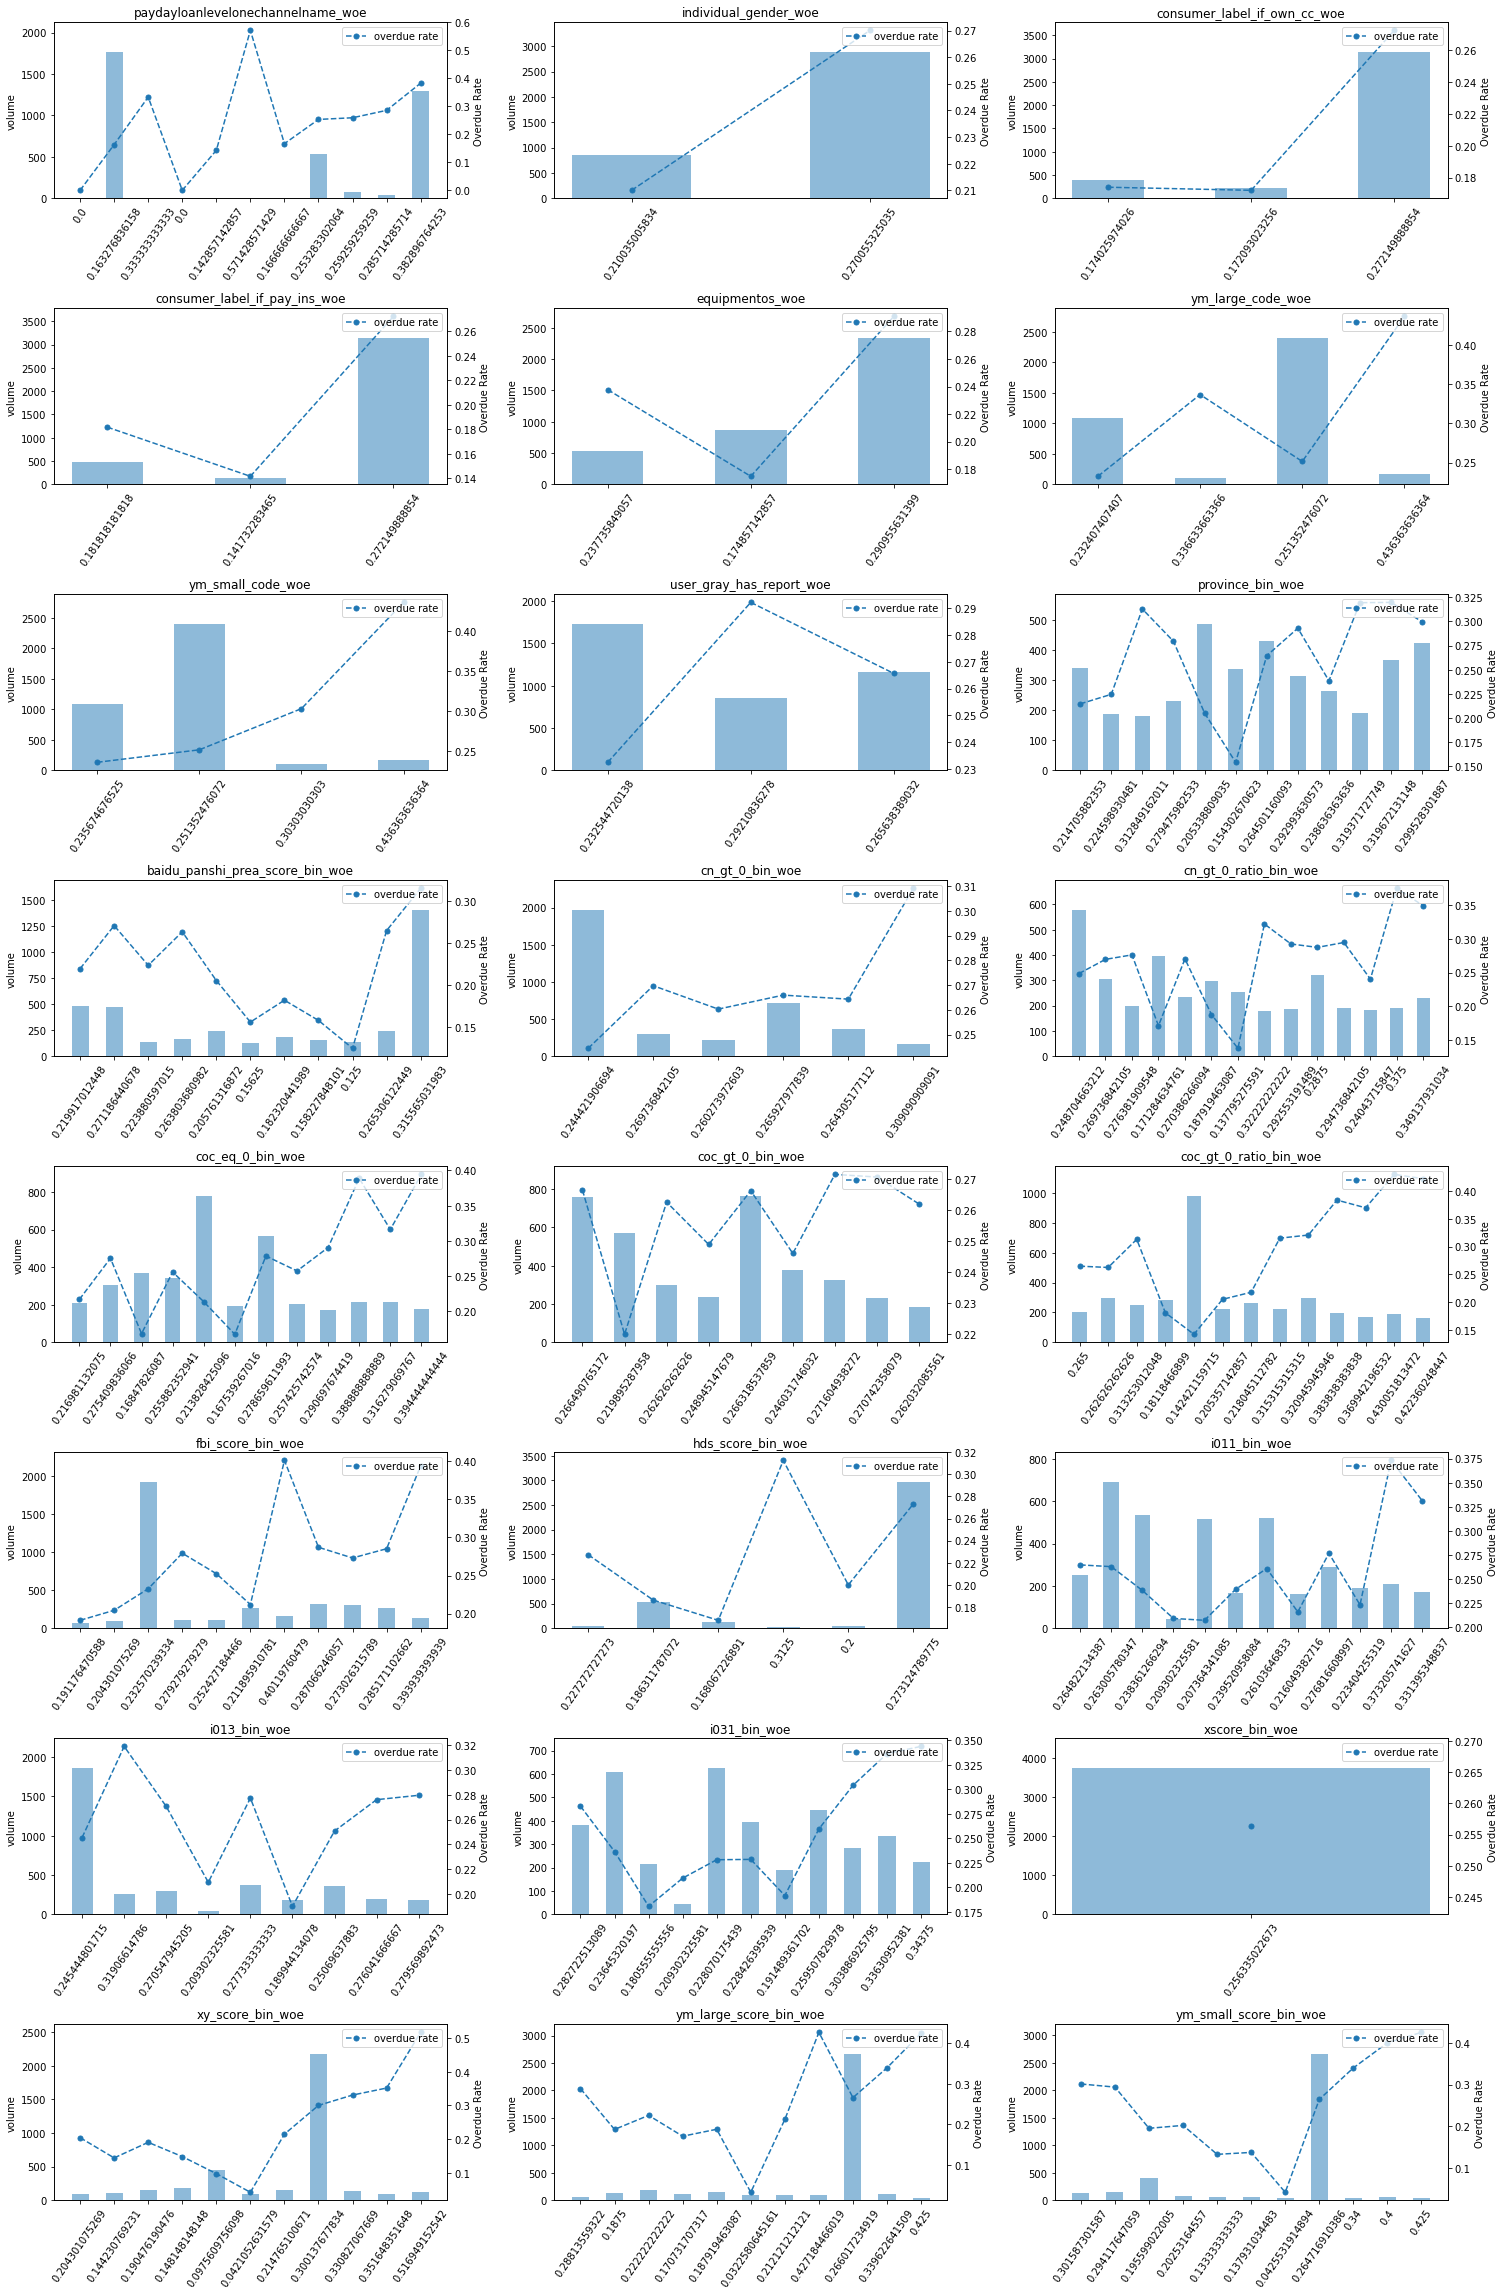

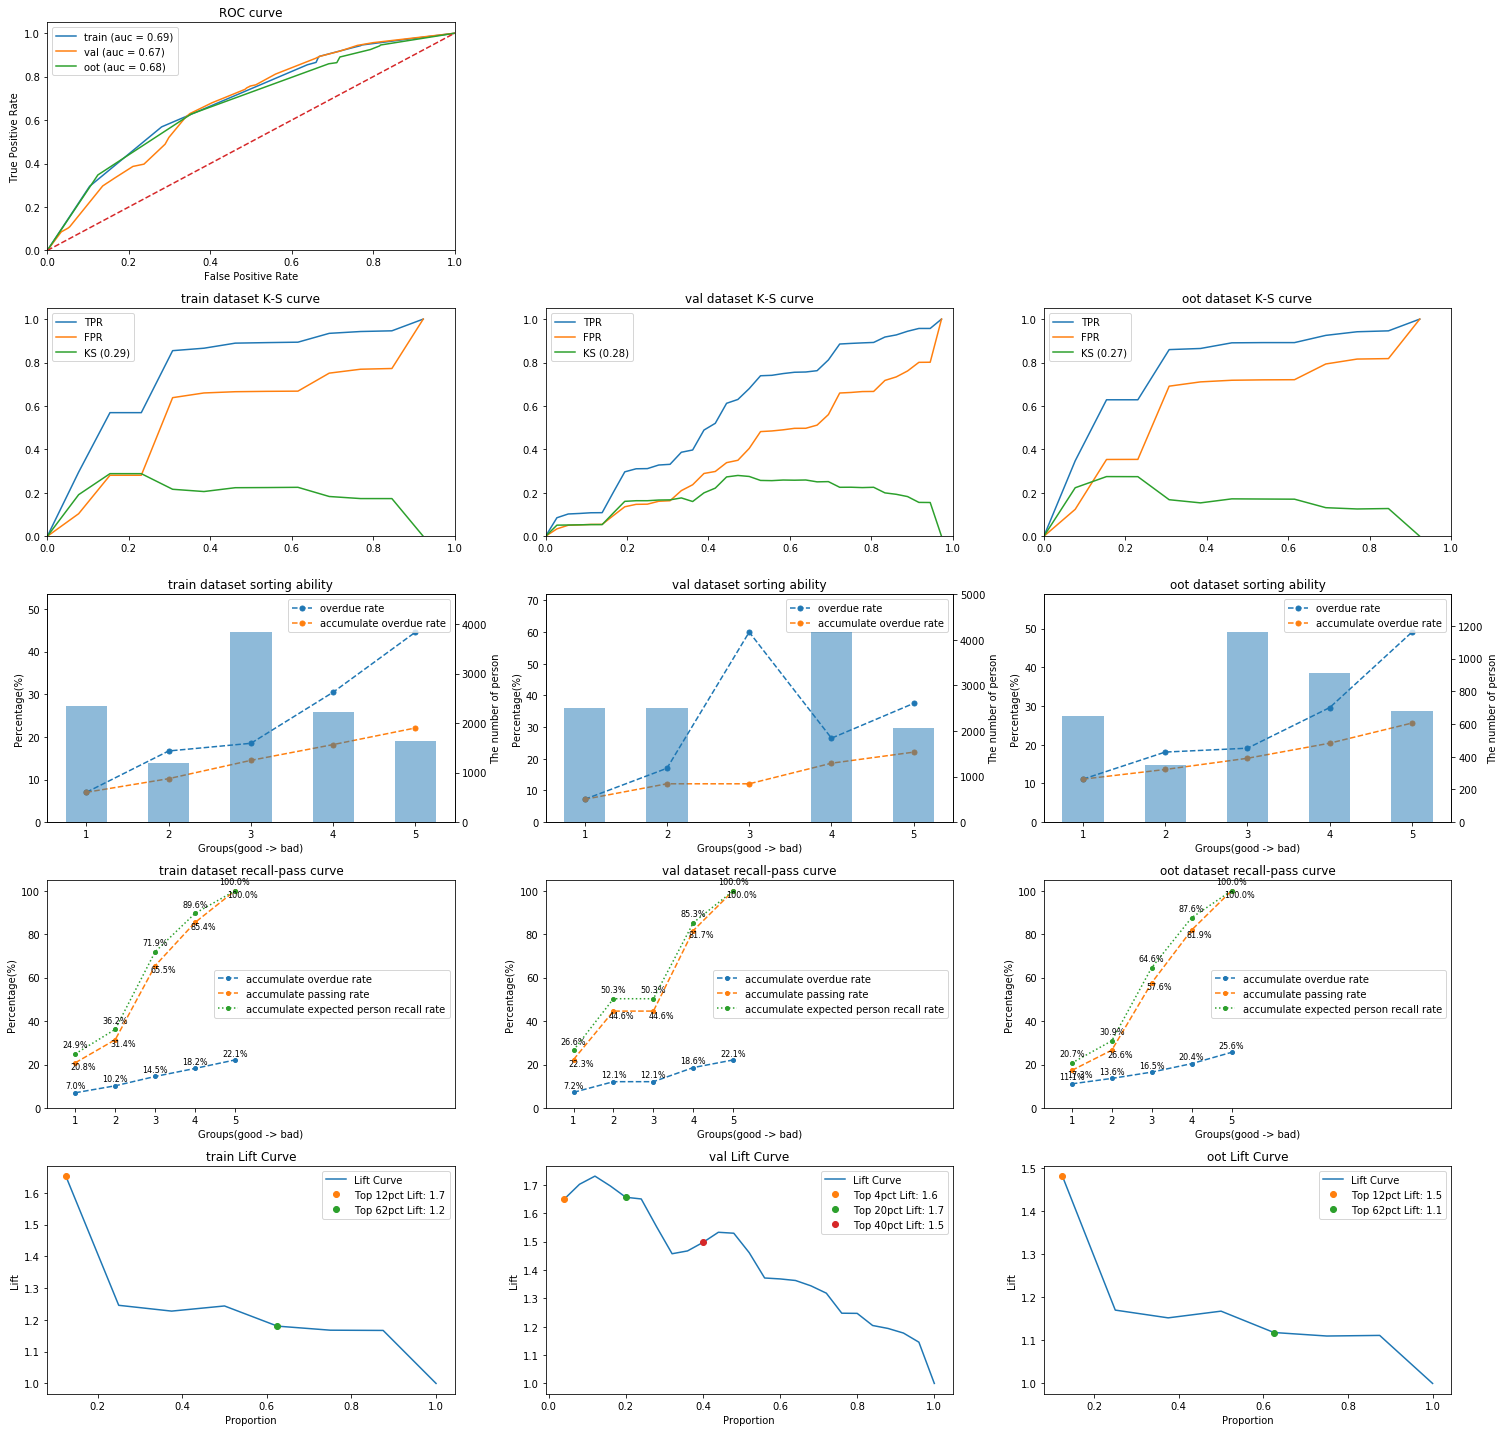

In [4]:
# test_path = '/Users/muzhen/repo/mlearn/mlearn/data/post_model_test.pkl'
# test_path = '/Users/muzhen/repo/mlearn/mlearn/data/xk_v4_data.pkl'
# test_path = '/Users/muzhen/repo/mlearn/mlearn/data/old_blind_data.pkl'
# test_path = '/Users/muzhen/repo/mlearn/mlearn/data/post_xk_25split.pkl'
mlearn.chaintest(test_path, label='14d', app_f=False, optimizer_f=False, custom_params=params, sampler_f=False)

In [17]:
df = pd.read_pickle('/Users/muzhen/repo/mlearn/mlearn/flow/spliter/report/')
','.join(df.columns)

'14d,apply_risk_created_at_end,apply_risk_created_at_start,sample_num'

In [2]:
tmp = mlearn.service.reporter.data_reporter._gen_warning_report(report_src='/Users/muzhen/repo/mlearn/mlearn/flow', report_dst='/Users/muzhen/repo/mlearn/mlearn/flow/reporter')

In [16]:
df

StableFilter                             \
                                  extreme_ratio ftest-pvalue kstest-pvalue   
baidu_panshi_prea_score_bin_woe               0       0.7481             0   
cn_gt_0_bin_woe                               0       0.9999        0.0123   
cn_gt_0_ratio_bin_woe                         0       0.3785        0.0007   
coc_eq_0_bin_woe                              0       0.4003             0   
coc_gt_0_bin_woe                              0       0.8472             0   
coc_gt_0_ratio_bin_woe                        0       0.7982        0.0041   
consumer_label_if_own_cc_woe                  0            0             0   
consumer_label_if_pay_ins_woe                 0            0             0   
equipmentos_woe                               0       0.9987        0.0007   
fbi_score_bin_woe                             0            1             0   
hds_score_bin_woe                             0            0             0   
i011_bin_woe                                  0       0.1726        0.6032   
i013_bin_woe                                  0       0.0334        0.2234   
i031_bin_woe                                  0       0.9337        0.0022   
individual_gender_woe                         0       0.8428        0.9882   
paydayloanlevelonechannelname_woe             0            0             0   
province_bin_woe                              0       0.9844        0.5987   
user_gray_has_report_woe                      0            1             0   
xscore_bin_woe                                0            0             0   
xy_score_bin_woe                              0            0             0   
ym_large_code_woe                             0            0             0   
ym_large_score_bin_woe                        0            0             0   
ym_small_code_woe                             0            0             0   
ym_small_score_bin_woe                        0            0             0   

                                                                    \
                                  null ratio(train, test)      psi   
baidu_panshi_prea_score_bin_woe                (0.0, 0.0)   0.0432   
cn_gt_0_bin_woe                                (0.0, 0.0)    0.009   
cn_gt_0_ratio_bin_woe                          (0.0, 0.0)   0.0176   
coc_eq_0_bin_woe                               (0.0, 0.0)   0.0248   
coc_gt_0_bin_woe                               (0.0, 0.0)   0.0146   
coc_gt_0_ratio_bin_woe                         (0.0, 0.0)   0.0219   
consumer_label_if_own_cc_woe                   (0.0, 0.0)   0.0216   
consumer_label_if_pay_ins_woe                  (0.0, 0.0)   0.0216   
equipmentos_woe                                (0.0, 0.0)   0.0043   
fbi_score_bin_woe                              (0.0, 0.0)    0.031   
hds_score_bin_woe                              (0.0, 0.0)   0.0907   
i011_bin_woe                                   (0.0, 0.0)   0.0025   
i013_bin_woe                                   (0.0, 0.0)   0.0063   
i031_bin_woe                                   (0.0, 0.0)   0.0118   
individual_gender_woe                          (0.0, 0.0)        0   
paydayloanlevelonechannelname_woe              (0.0, 0.0)    0.027   
province_bin_woe                               (0.0, 0.0)   0.0048   
user_gray_has_report_woe                       (0.0, 0.0)   0.3361   
xscore_bin_woe                                 (0.0, 0.0)  10.5513   
xy_score_bin_woe                               (0.0, 0.0)   0.0158   
ym_large_code_woe                              (0.0, 0.0)   0.2414   
ym_large_score_bin_woe                         (0.0, 0.0)   0.1944   
ym_small_code_woe                              (0.0, 0.0)   0.0133   
ym_small_score_bin_woe                         (0.0, 0.0)    0.198   

                                                            \
                                  ttest-pvalue psi_support   
baidu_panshi_prea_score_bin_woe              0        True   

# spiter test

In [ ]:
json_str = {
    "ds":{
        "data":test_path,
        "train":None,
        "test":None,
        "label":{"name":label, "type": "number"}
    },
    "out":{"dst":"/Users/muzhen/dev/flow_0/spliter"},
    "st":{
        "method":"oot",
        "time_col":"biz_report_expect_at",
        "index_col":"apply_risk_id",
        "label_col":"overdue_days",
        "test_size":0.2,
        "random_state":7
    }
}
json_str = json.dumps(json_str)
json_str

In [297]:
json_str = json.dumps(params['spliter'])

In [ ]:
mlearn.spliter_ui(json_str)

# transformer 测试

In [ ]:
label = '7d'
dst = '/Users/muzhen/dev/8799/'
time_col = 'biz_report_expect_at'
index_col = 'apply_risk_id'
label_col = 'overdue_days'
cate_dict = '/Users/muzhen/repo/documents/report/自有数据探索/equipment_app/cate_dict_20180806_v1.pkl'

json_str = {
    "ds": {
        "train": dst + "spliter/train/spliter_result.pkl",
        "test": dst + "spliter/test/spliter_result.pkl",
        "label": {"name": label, "type": "number"}
    },
    "out": {"dst": dst + "transformer"},
    "st": {
        "method": "auto",
        "params": {
            "thr": 5
        },
        "verbose": True,
        "cate": [
            {
                "cols": [],
                "encoders":[
                    {
                        "method": "BaseEncoder",
                        "params": {
                            "missing_thr": 0.8,
                            "same_thr": 0.9,
                            "cate_thr": 0.5
                        }
                    },
                    {
                        "method": "CountEncoder",
                        "params": {
                            "unseen_value": 1,
                            "log_transform": True,
                            "smoothing": 1
                        }
                    }
                ]
            }
        ],
        "cont": [
            {
                "cols": [],
                "encoders":[
                    {
                        "method": "BaseEncoder",
                        "params": {
                            "missing_thr": 0.8,
                            "same_thr": 0.9,
                            "cate_thr": 0.5
                        }
                    },
                    {
                        "method": "ContImputerEncoder",
                        "params": {
                            "missing_values": "NaN",
                            "strategy": "mean",
                            "axis": 0,
                            "verbose": 0
                        }
                    },
                    {
                        "method": "ContBinningEncoder",
                        "params": {
                            "diff_thr": 20,
                            "bins": 10,
                            "binning_method": "dt"
                        }
                    },
                    {
                        "method": "WOEEncoder",
                        "params": {
                            "diff_thr": 20,
                            "woe_min": -20,
                            "woe_max": 20,
                            "nan_thr": 0.01
                        }
                    }
                ]
            }
        ]
                ,"custom":[
                    {
                        "cols":["equipment_app_name"],
                        "encoders":[
                            {
                                "method":"AppCateEncoder",
                                "params":{
                                    "cate_dict":cate_dict,
                                    "delimiter":",",
                                    "prefix":"app_",
                                    "unknown":"unknown"
                                }
                            }
                        ]
                    }
                ]
    }
}
json_str = json.dumps(json_str)
json_str

In [ ]:
mlearn.transformer_ui(json_str)

# filter测试

In [ ]:
label = '14d'
json_str = json.dumps({'ds': {'label': {'name': label, 'type': 'number'},
   'test': '/Users/muzhen/dev/flow_0/transformer/test/transformer_result.pkl',
   'train': '/Users/muzhen/dev/flow_0/transformer/train/transformer_result.pkl'},
  'out': {'dst': '/Users/muzhen/dev/flow_0/filter'},
  'st': [{'method': 'SelectFromModelFilter',
     'params': {
      'n_features_to_select': 60,
      'estimator': {
          'estimator': 'LogisticRegression',
      "params": {}}}}]})

In [ ]:
label = '14d'
json_str = json.dumps({'ds': {'label': {'name': label, 'type': 'number'},
   'test': '/Users/muzhen/dev/flow_0/transformer/test/transformer_result.pkl',
   'train': '/Users/muzhen/dev/flow_0/transformer/train/transformer_result.pkl'},
  'out': {'dst': '/Users/muzhen/dev/flow_0/filter'},
  'st': [{'method': 'SelectKBestFilter',
     'params': {
      'n_features_to_select': 60,
      'k': 60,
      'score_func': 'f_classif'}}]})

In [ ]:
label = '14d'
json_str = json.dumps({'ds': {'label': {'name': label, 'type': 'number'},
   'test': '/Users/muzhen/dev/flow_0/transformer/test/transformer_result.pkl',
   'train': '/Users/muzhen/dev/flow_0/transformer/train/transformer_result.pkl'},
  'out': {'dst': '/Users/muzhen/dev/flow_0/filter'},
  'st': [{'method': 'RFEFilter',
     'params': {
      'n_features_to_select': 60,
      'estimator': {
          'estimator': 'LogisticRegression',
      "params": {}}}}]})

In [10]:
json_str = json.dumps({'ds': {'label': {'name': '14d', 'type': 'number'},
                              'test': '/Users/muzhen/repo/mlearn/mlearn/data/test_data/xk_v4_test_transformer_result.pkl',
                              'train': '/Users/muzhen/repo/mlearn/mlearn/data/test_data/xk_v4_train_transformer_result.pkl'},
                       'out': {'dst': '/Users/muzhen/repo/mlearn/mlearn/flow/filter'},
                       'st': [{'method': 'RFEFilter',
                               'params': {'estimator': {'method': 'GradientBoostingClassifier',
                                                        'params': {'criterion': 'friedman_mse',
                                                                   'init': None,
                                                                   'learning_rate': 0.1,
                                                                   'loss': 'deviance',
                                                                   'max_depth': 3,
                                                                   'max_features': None,
                                                                   'max_leaf_nodes': None,
                                                                   'min_impurity_decrease': 0.0,
                                                                   'min_impurity_split': None,
                                                                   'min_samples_leaf': 1,
                                                                   'min_samples_split': 2,
                                                                   'min_weight_fraction_leaf': 0.0,
                                                                   'n_estimators': 100,
                                                                   'presort': 'auto',
                                                                   'random_state': None,
                                                                   'subsample': 1.0,
                                                                   'verbose': 0,
                                                                   'warm_start': False}},
                                          'method': 'RFE',
                                          'n_features_to_select': 60}}]})

In [11]:
mlearn.filter_ui(json_str)

Traceback (most recent call last):
  File "/Users/muzhen/repo/mlearn/mlearn/service/base_utils/instantiate_utils.py", line 55, in instantiate
    enc = eval(method)(**method_params)
TypeError: __init__() got an unexpected keyword argument 'method'

/Users/muzhen/repo/mlearn/udf/RFE.py
Traceback (most recent call last):
  File "/Users/muzhen/repo/mlearn/mlearn/service/base_utils/instantiate_utils.py", line 55, in instantiate
    enc = eval(method)(**method_params)
TypeError: __init__() got an unexpected keyword argument 'method'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/muzhen/repo/mlearn/mlearn/interface/filter.py", line 29, in filter_ui
    df_train = enc.fit_transform(train_src, label, test_src, label)
  File "/Users/muzhen/repo/mlearn/mlearn/service/filter/feature_filter.py", line 68, in fit_transform
    tmp = enc.fit_transform(tmp, label, test_tmp, test_label)
  File "/Users/muzhen/repo/mlearn/mlearn/ser

'{"code": 2, "msg": "Traceback (most recent call last):\\n  File \\"/Users/muzhen/repo/mlearn/mlearn/service/base_utils/instantiate_utils.py\\", line 55, in instantiate\\n    enc = eval(method)(**method_params)\\nTypeError: __init__() got an unexpected keyword argument \'method\'\\n\\nDuring handling of the above exception, another exception occurred:\\n\\nTraceback (most recent call last):\\n  File \\"/Users/muzhen/repo/mlearn/mlearn/interface/filter.py\\", line 29, in filter_ui\\n    df_train = enc.fit_transform(train_src, label, test_src, label)\\n  File \\"/Users/muzhen/repo/mlearn/mlearn/service/filter/feature_filter.py\\", line 68, in fit_transform\\n    tmp = enc.fit_transform(tmp, label, test_tmp, test_label)\\n  File \\"/Users/muzhen/repo/mlearn/mlearn/service/filter/base_filter.py\\", line 85, in fit_transform\\n    return self.fit(X_train, y_train, X_test, y_test).transform(X_train)\\n  File \\"/Users/muzhen/repo/mlearn/mlearn/service/filter/base_filter.py\\", line 65, in fi

# optimizer测试

In [ ]:
json_str = json.dumps({
    "ds": {
        "train": "/Users/muzhen/dev/flow_0/filter/train/filter_result.pkl",
        "test": "/Users/muzhen/dev/flow_0/filter/test/filter_result.pkl",
        "label": {
            "name": label,
            "type": "number"
        }
    },
    "out": {
        "dst": "/Users/muzhen/dev/flow_0/optimizer"
    },
    "st": {
        "opt_method": "BayesianOptimizer",
        "n_folds": 0,
        "test_size": 0.2,
        "score_func": "roc_auc",
        "opt_params": {
            "init_points": 1,
            "n_iter": 1,
            "acq": "ucb",
            "kappa": 2.576,
            "alpha": 10e-5
        },
        "params": {
            "gamma": [0, 1],
            "learning_rate": [0.001, 0.8],
            "max_depth": [2, 8],
#             "min_child_weight": [1, 1],
            "n_estimators": [100, 2000],
            "reg_lambda": [0, 40],
#             "subsample": [0.7, 0.7]
        },
        "method": "XGBClassifier"
    }
}
)
json_str

In [ ]:
mlearn.optimizer_ui(json_str)

# trainer 测试

In [44]:

label = '14d'

json_str = json.dumps({
    "ds": {
        "train": os.path.join(dst, "filter/train/filter_result.pkl"),
        "test": os.path.join(dst, "filter/test/filter_result.pkl"),
        "label": {"name": label, "type": "number"}
    },
    "out": {"dst": os.path.join(dst, "trainer")},
    "st": {
        "test_size": 0,
        "oversample": False,
        "n_folds": 5,
        "random_state": 7,
        "shift_thr": 0.1,
        "reweight": False,
        "reweight_with_label": True,
        "estimator": {
            "estimator": "XGBClassifier",
            "params": {
                "colsample_bytree": 0.8,
                "reg_lambda": 20,
                "silent": True,
                "base_score": 0.5,
                "scale_pos_weight": 1,
                "eval_metric": "auc",
                "max_depth": 3,
                "n_jobs": 1,
                "early_stopping_rounds": 300,
                "n_estimators": 1000,
                "random_state": 0,
                "reg_alpha": 1,
                "booster": "gbtree",
                "objective": "binary:logistic",
                "verbose": False,
                "colsample_bylevel": 0.8,
                "subsample": 0.7,
                "learning_rate": 0.1,
                "gamma": 0.5,
                "max_delta_step": 0,
                "min_child_weight": 10
            }
        },
        "verbose": True,
        "cut_off_sample_ratio": 0.5,
        'cut_off_use_weights': False
    }
})
json_str

'{"ds": {"train": "/Users/muzhen/repo/mlearn/mlearn/flow/filter/train/filter_result.pkl", "test": "/Users/muzhen/repo/mlearn/mlearn/flow/filter/test/filter_result.pkl", "label": {"name": "14d", "type": "number"}}, "out": {"dst": "/Users/muzhen/repo/mlearn/mlearn/flow/trainer"}, "st": {"test_size": 0, "oversample": false, "n_folds": 5, "random_state": 7, "shift_thr": 0.1, "reweight": false, "reweight_with_label": true, "estimator": {"estimator": "XGBClassifier", "params": {"colsample_bytree": 0.8, "reg_lambda": 20, "silent": true, "base_score": 0.5, "scale_pos_weight": 1, "eval_metric": "auc", "max_depth": 3, "n_jobs": 1, "early_stopping_rounds": 300, "n_estimators": 1000, "random_state": 0, "reg_alpha": 1, "booster": "gbtree", "objective": "binary:logistic", "verbose": false, "colsample_bylevel": 0.8, "subsample": 0.7, "learning_rate": 0.1, "gamma": 0.5, "max_delta_step": 0, "min_child_weight": 10}}, "verbose": true, "cut_off_sample_ratio": 0.5, "cut_off_use_weights": false}}'

'{"ds": {"train": "/Users/muzhen/repo/mlearn/mlearn/flow/filter/train/filter_result.pkl", "test": "/Users/muzhen/repo/mlearn/mlearn/flow/filter/test/filter_result.pkl", "label": {"name": "14d", "type": "number"}}, "out": {"dst": "/Users/muzhen/repo/mlearn/mlearn/flow/trainer"}, "st": {"test_size": 0, "oversample": false, "n_folds": 5, "random_state": 7, "shift_thr": 0.1, "reweight": false, "reweight_with_label": true, "estimator": {"method": "SkopeRuler", "params": {"random_state": 7, "precision_min": 0.1, "recall_min": 0.05}}, "verbose": true, "cut_off_sample_ratio": 0.5, "cut_off_use_weights": false}}'

In [4]:
json_str = json.dumps(params['trainer'])

{'train_auc': 0.6884958663141566, 'val_auc': 0.67957115555361813}
{'train_auc': 0.70183969220724673, 'val_auc': 0.69540173155303753}
{'train_auc': 0.68795929423184243, 'val_auc': 0.68250690681453241}
{'train_auc': 0.70223915883874, 'val_auc': 0.70100638055371589}
{'train_auc': 0.67961716541943806, 'val_auc': 0.68965069098135912}


/home/muzhen/repo/mlearn/mlearn/service/reporter/visualize.py:645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  final_df['count'] = tmp.sum()['count'].tolist()
/home/muzhen/repo/mlearn/mlearn/service/reporter/visualize.py:649: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  final_df['acc_overdue_rate'] = acc_overdue['y_true'] / acc_overdue['count']


'{"code": 1, "msg": "succ", "result": {"ds": {"train": "/home/muzhen/repo/mlearn/mlearn/flow/trainer/train/result", "test": "/home/muzhen/repo/mlearn/mlearn/flow/trainer/test/trainer_result.pkl"}, "meta": "/home/muzhen/repo/mlearn/mlearn/flow/trainer/train/trainer_enc.pkl", "report": "/home/muzhen/repo/mlearn/mlearn/flow/trainer/report"}}'

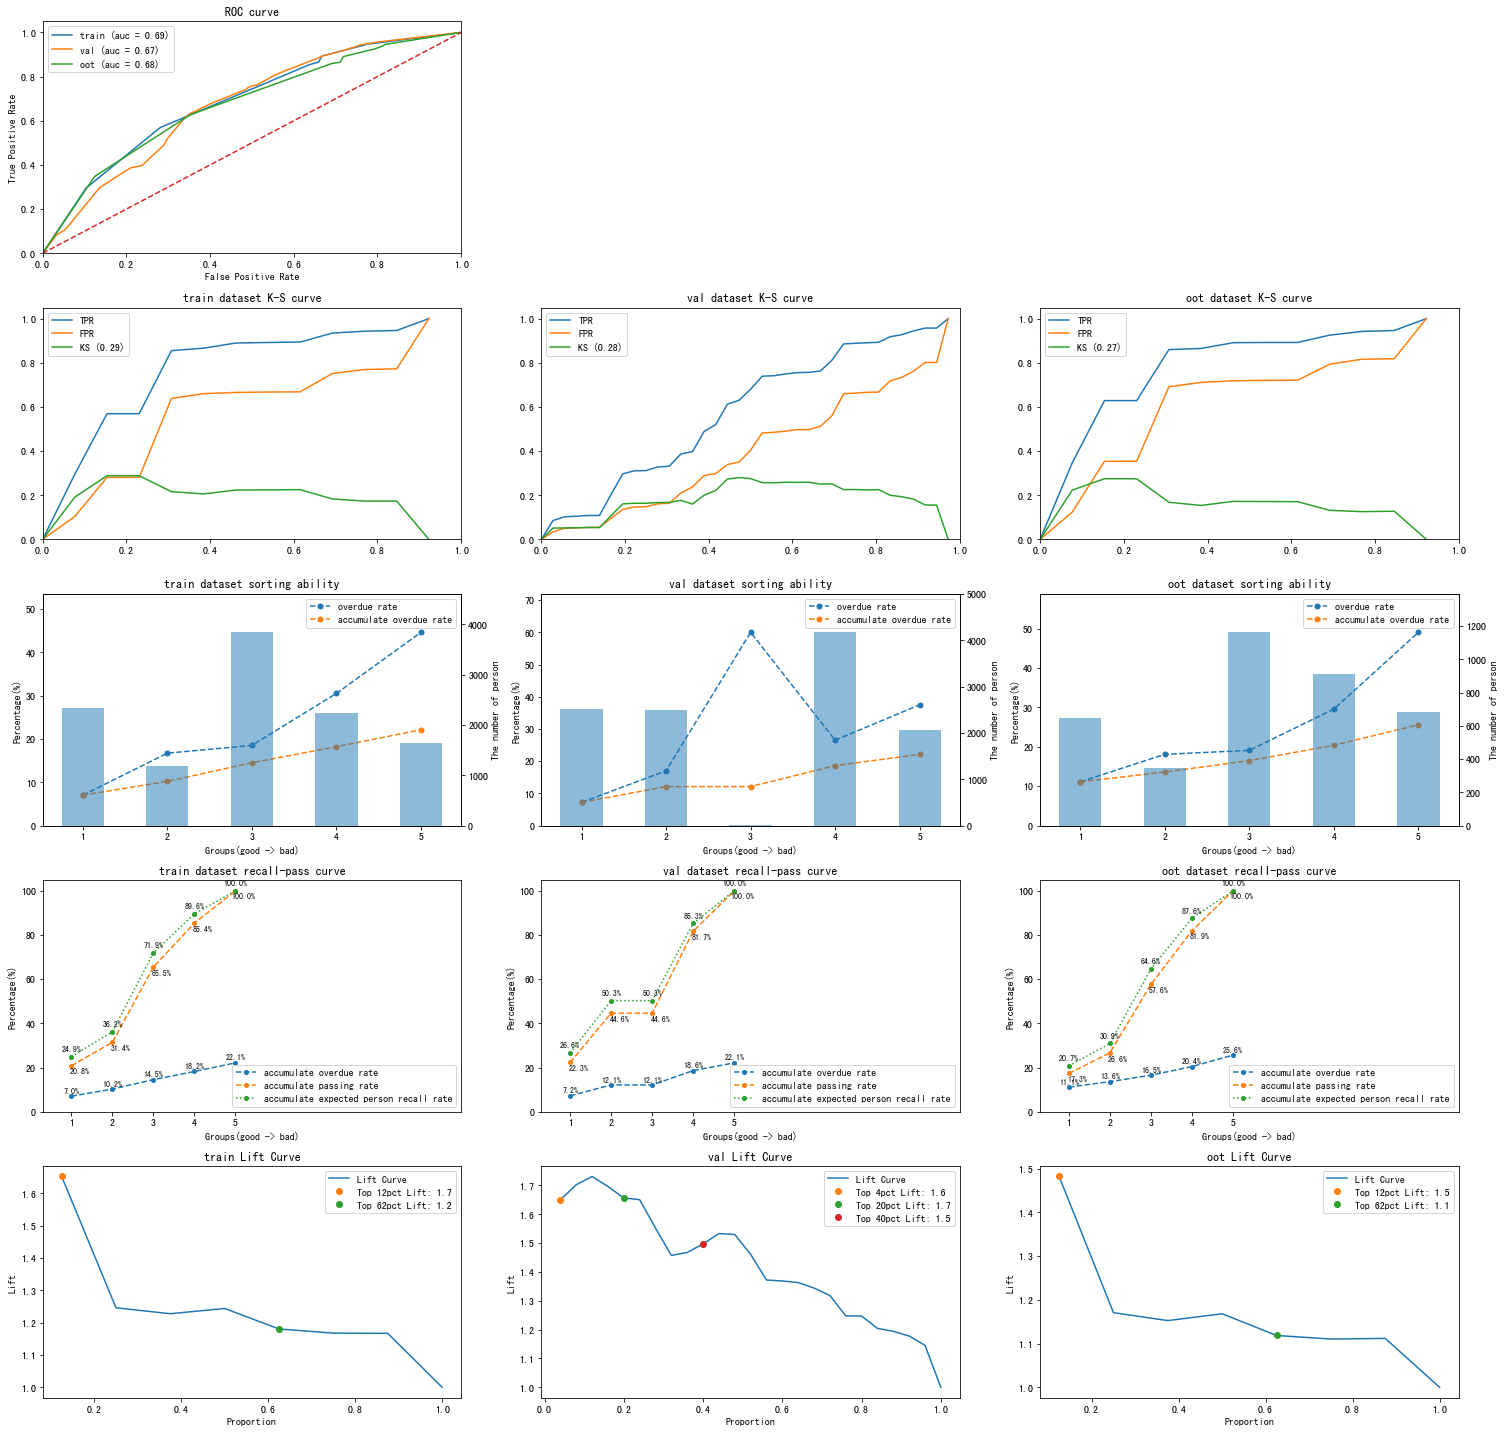

In [5]:
mlearn.trainer_ui(json_str)

In [57]:
import urllib.request
from PIL import Image
import xlsxwriter
import os


writer = pd.ExcelWriter('/Users/muzhen/dev/test.xlsx')
df = pd.read_pickle('/Users/muzhen/repo/mlearn/mlearn/flow/transformer/report/data_stats.report')
df.to_excel(writer, sheet_name='transformer_feature_plot')
workbook = writer.book
worksheet = writer.sheets['transformer_feature_plot']

img = Image.open('/Users/muzhen/repo/mlearn/mlearn/flow/transformer/report/train_feature_plot.png')
img = img.resize((70,30), Image.ANTIALIAS)
worksheet.set_column('A:B', 30)
worksheet.set_row(1, 70)
worksheet.set_row(2, 70)
img.save('/Users/muzhen/dev/local_30_perc.png') 
worksheet.insert_image('B02', '/Users/muzhen/dev/local_30_perc.png')
worksheet.insert_image('B03', '/Users/muzhen/dev/local_30_perc.png')
workbook.close()

writer.save()
writer.close()

0

<Container object of 11 artists>

<Container object of 11 artists>

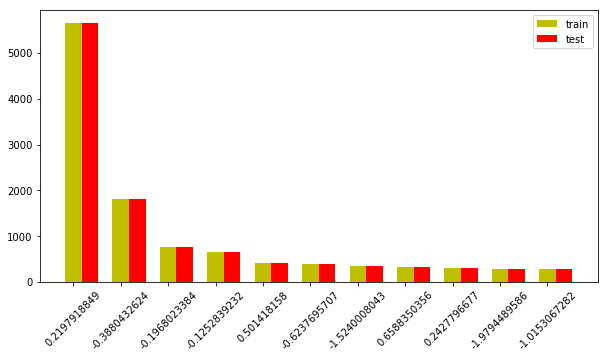

In [403]:
fig=plt.figure(figsize=(10,5))
axes=fig.add_subplot(1,1,1)
axes.bar(np.arange(len(dic)), list(dic.values()), width=0.35, fc='y', label='train')
axes.bar(np.arange(len(dic))+0.35, list(dic.values()), width=0.35, fc='r', label='test')
axes.set_xticks(np.arange(len(dic)))
axes.set_xticklabels(list(dic.keys()), rotation=45)
plt.legend(loc='best')

In [408]:
def createFigure(i):
    fig, ax = plt.subplots(figsize=(.4,.4))
    fig.subplots_adjust(0,0,1,1)
    ax.axis("off")
    ax.axis([0,1,0,1])
    c = plt.Circle((.5,.5), .4, color=cmap(i))
    ax.add_patch(c)
    ax.text(.5,.5, str(i), ha="center", va="center")
    return fig

    fig=plt.figure(figsize=(10,5))
    axes=fig.add_subplot(1,1,1)
    axes.bar(np.arange(len(dic)), list(dic.values()), width=0.35, fc='y', label='train')
    axes.bar(np.arange(len(dic))+0.35, list(dic.values()), width=0.35, fc='r', label='test')
    axes.set_xticks(np.arange(len(dic)))
    axes.set_xticklabels(list(dic.keys()), rotation=45)
    plt.legend(loc='best')
    return fig

def mapping(i):
    fig = createFigure(i)
    fname = "/Users/muzhen/dev/map_{}.png".format(i)
    fig.savefig(fname)
    imgstr = '<img src="{}" /> '.format(fname)
    return imgstr


In [467]:
df = pd.read_pickle('/Users/muzhen/repo/mlearn/mlearn/data/xk_v4_data.pkl')
df['apply_risk_created_at'] = pd.to_datetime(df.apply_risk_created_at, format='%Y-%m-%d')

# inference 测试

In [ ]:
json_str = json.dumps({
    "ds":{
        "test":test_path,
        "meta":"/Users/muzhen/dev/flow_0/transformer/train/transformer_enc.pkl",
        "label":{"name":label, "type": "number"}
    },
    "out":{"dst":"/Users/muzhen/dev/flow_0/result.pkl"}
})
json_str

In [ ]:
mlearn.inference_ui(json_str)

In [ ]:
textmod = '{"\\u624b\\u673a\\u53ef\\u4fe1\\u7b49\\u7ea7":3.0,"\\u767d\\u5929\\u8d2d\\u7269\\u4e30\\u5bcc\\u5ea6":4.0,"\\u652f\\u4ed8\\u65f6\\u95f4\\u4e0e\\u4e0b\\u5355\\u65f6\\u95f4\\u95f4\\u9694\\u7684\\u5747\\u503c":17.0,"\\u652f\\u4ed8\\u65f6\\u95f4\\u8ddd\\u79bb\\u7533\\u8bf7\\u65f6\\u95f4\\u6700\\u5927\\u95f4\\u9694\\u4e0e\\u6700\\u5c0f\\u95f4\\u9694\\u4e4b\\u5dee":771.0,"\\u624b\\u673a\\u53f7\\u4e30\\u5bcc\\u5ea6":1.0,"\\u6bcf\\u5e74\\u8ba2\\u5355\\u603b\\u91d1\\u989d\\u7684\\u5e74\\u6700\\u5c0f\\u589e\\u957f\\u7387":-0.6708302719,"\\u652f\\u4ed8\\u65f6\\u95f4\\u8ddd\\u79bb\\u7533\\u8bf7\\u65f6\\u95f4\\u7684\\u6700\\u5927\\u65f6\\u95f4\\u95f4\\u9694":1068.0,"\\u6bcf\\u5e74\\u8ba2\\u5355\\u603b\\u91d1\\u989d\\u7684\\u5e74\\u6700\\u5927\\u589e\\u957f\\u7387":-0.6428571429,"\\u6bcf\\u5e74\\u8ba2\\u5355\\u603b\\u91d1\\u989d\\u7684\\u504f\\u5ea6\\uff08\\u6837\\u672c\\u7684\\u4e09\\u9636\\u6807\\u51c6\\u5316\\u77e9\\uff09":1.3301087836,"\\u6bcf\\u6708\\u8ba2\\u5355\\u603b\\u91d1\\u989d\\u7684\\u6700\\u5927\\u503c":380.9,"\\u7535\\u5546\\u4fe1\\u7528\\u8bc4\\u5206":665.0,"1\\uff1a00-5:59\\u65f6\\u6bb5\\u8ba2\\u5355\\u91d1\\u989d\\u768425%\\u5206\\u4f4d\\u6570":null,"\\u67d0\\u4e00\\u5e73\\u53f0\\u4e0a\\u7684\\u6700\\u5927\\u5e73\\u5747\\u8ba2\\u5355\\u91d1\\u989d":65.6333333333,"\\u53cc\\u5341\\u4e00\\u8ba2\\u5355\\u91d1\\u989d\\u7684\\u6700\\u5c0f\\u503c":null,"\\u652f\\u4ed8\\u65f6\\u95f4\\u8ddd\\u79bb\\u7533\\u8bf7\\u65f6\\u95f4\\u7684\\u95f4\\u9694\\u7684\\u4e2d\\u4f4d\\u6570":680.0,"\\u6700\\u8fd112\\u4e2a\\u6708\\u7535\\u5546\\u6d88\\u8d39\\u91d1\\u989d":48.0,"\\u6700\\u8fd1\\u6d88\\u8d39\\u6708\\u4efd\\u8ddd\\u4eca\\u6708\\u4efd\\u6570":9.0,"\\u6bcf\\u5e74\\u8ba2\\u5355\\u5e73\\u5747\\u91d1\\u989d\\u7684\\u5e74\\u6700\\u5927\\u589e\\u957f\\u7387":0.4285714286,"36\\u4e2a\\u6708\\u5185\\u670d\\u88c5\\u7c7b\\u7684\\u5546\\u54c1\\u7684\\u5e73\\u5747\\u8ba2\\u5355\\u91d1\\u989d":85.58,"\\u5e74\\u5ea6\\u6d88\\u8d39\\u603b\\u91d1\\u989d":48.0,"\\u6d88\\u8d39\\u4e30\\u5bcc\\u5ea6":1.0,"\\u4ed8\\u6b3e\\u65f6\\u95f4\\u4e0e\\u8ba2\\u5355\\u65f6\\u95f4\\u5dee\\u7684\\u4e2d\\u4f4d\\u6570":12.0,"\\u652f\\u4ed8\\u65f6\\u95f4\\u4e0e\\u4e0b\\u5355\\u65f6\\u95f4\\u95f4\\u9694\\u768425%\\u5206\\u4f4d\\u6570":9.0,"\\u5ba2\\u6237\\u8bb0\\u5f55\\u4e30\\u5bcc\\u5ea6":4.0,"\\u4ed8\\u6b3e\\u65f6\\u95f4\\u4e0e\\u8ba2\\u5355\\u65f6\\u95f4\\u5dee\\u768475%\\u5206\\u4f4d\\u6570":22.5,"\\u6700\\u8fd112\\u4e2a\\u6708\\u5355\\u6708\\u6700\\u5927\\u6d88\\u8d39\\u91d1\\u989d":96.0,"\\u6708\\u6d88\\u8d39\\u6d3b\\u8dc3\\u5ea6":3.0,"\\u6708\\u5185\\u591c\\u95f4\\u6d88\\u8d39\\u603b\\u91d1\\u989d\\uff08\\u8fd112\\u4e2a\\u6708\\uff09":0.0,"\\u6700\\u5927\\u65e0\\u6d88\\u8d39\\u95f4\\u9694\\u6708\\u6570":5.0,"\\u5730\\u5740\\u57ce\\u5e02\\u4e2d\\u4e09\\u7ebf\\u57ce\\u5e02\\u6570\\u91cf":0.0}'

In [ ]:
t = pd.DataFrame(json.loads(textmod), index=range(1))

In [ ]:
t.iloc[0].to_json(orient='index')

# 全链路测试

In [ ]:
label = '01d'
test_path = "/Users/muzhen/dev/flow_0/datasource/data_for_platform_20180807_v3.csv"
test_path = "/Users/muzhen/dev/flow_0/datasource/data_for_platform_20180807.pkl"
test_path = '/Users/muzhen/dev/flow_0/datasource/fixed_platform_v4_2.csv'
dst = '/Users/muzhen/dev/flow_0/'
time_col = 'biz_report_expect_at'
index_col = 'apply_risk_id'
label_col = 'overdue_days'
cate_dict = '/Users/muzhen/repo/documents/report/自有数据探索/equipment_app/cate_dict_20180806_v1.pkl'

json_str = {
    "ds": {
        "table": test_path,
        "train": None,
        "test": None,
        "label": {"name": label, "type": "number"}
    },
    "out": {"dst": dst + "spliter"},
    "st": {
        "method": "oot",
        "time_col": time_col,
        "index_col": index_col,
        "label_col": label_col,
        "test_size": 0.1,
        "random_state": 7
    }
}
json_str = json.dumps(json_str)
json_str

mlearn.spliter_ui(json_str)

json_str = {
    "ds": {
        "train": dst + "spliter/train/spliter_result.pkl",
        "test": dst + "spliter/test/spliter_result.pkl",
        "label": {"name": label, "type": "number"}
    },
    "out": {"dst": dst + "transformer"},
    "st": {
        "method": "auto",
        "params": {
            "thr": 5
        },
        "verbose": True,
        "cate": [
            {
                "cols": [],
                "encoders":[
                    {
                        "method": "BaseEncoder",
                        "params": {
                            "missing_thr": 0.8,
                            "same_thr": 0.9,
                            "cate_thr": 0.5
                        }
                    },
                    {
                        "method": "CountEncoder",
                        "params": {
                            "unseen_value": 1,
                            "log_transform": True,
                            "smoothing": 1
                        }
                    }
                ]
            }
        ],
        "cont": [
            {
                "cols": [],
                "encoders":[
                    {
                        "method": "BaseEncoder",
                        "params": {
                            "missing_thr": 0.8,
                            "same_thr": 0.9,
                            "cate_thr": 0.5
                        }
                    },
                    {
                        "method": "ContImputerEncoder",
                        "params": {
                            "missing_values": "NaN",
                            "strategy": "mean",
                            "axis": 0,
                            "verbose": 0
                        }
                    },
                    {
                        "method": "ContBinningEncoder",
                        "params": {
                            "diff_thr": 20,
                            "bins": 10,
                            "binning_method": "dt"
                        }
                    },
                    {
                        "method": "WOEEncoder",
                        "params": {
                            "diff_thr": 20,
                            "woe_min": -20,
                            "woe_max": 20,
                            "nan_thr": 0.01
                        }
                    }
                ]
            }
        ]
        #         ,"custom":[
        #             {
        #                 "cols":["equipment_app_name"],
        #                 "encoders":[
        #                     {
        #                         "method":"AppCateEncoder",
        #                         "params":{
        #                             "cate_dict":cate_dict,
        #                             "delimiter":",",
        #                             "prefix":"app_",
        #                             "unknown":"unknown"
        #                         }
        #                     }
        #                 ]
        #             }
        #         ]
    }
}
json_str = json.dumps(json_str)

mlearn.transformer_ui(json_str)

json_str = json.dumps({
    "ds": {
        "train": dst + "transformer/train/transformer_result.pkl",
        "test": dst + "transformer/test/transformer_result.pkl",
        "label": {"name": label, "type": "number"}
    },
    "st": {
        "method": "SelectKBest",
        "params": {
            "k": 60,
            "score_func": "f_classif"
        }
    },
    "out": {"dst": dst + "filter"}
})
json_str

mlearn.filter_ui(json_str)

json_str = json.dumps({
    "ds": {
        "train": dst + "filter/train/filter_result.pkl",
        "test": dst + "filter/test/filter_result.pkl",
        "label": {
            "name": label,
            "type": "number"
        }
    },
    "out": {
        "dst": dst + "optimizer"
    },
    "st": {
        "opt_method": "BayesianOptimizer",
        "n_folds": 0,
        "test_size": 0.2,
        "score_func": "roc_auc",
        "opt_params": {
            "init_points": 1,
            "n_iter": 1,
            "acq": "ucb",
            "kappa": 2.576,
            "alpha": 10e-5
        },
        "params": {
            "gamma": [0, 1],
            "learning_rate": [0.001, 0.8],
            "max_depth": [2, 8],
            #             "min_child_weight": [1, 1],
            "n_estimators": [100, 2000],
            "reg_lambda": [0, 40],
            #             "subsample": [0.7, 0.7]
        },
        "method": "XGBClassifier"
    }
}
)
json_str

mlearn.optimizer_ui(json_str)

json_str = json.dumps({
    "ds": {
        "train": dst + "filter/train/filter_result.pkl",
        "test": dst + "filter/test/filter_result.pkl",
        "label": {"name": label, "type": "number"}
    },
    "out": {"dst": dst + "trainer"},
    "st": {
        "method": "XGBClassifier",
        "test_size": 0,
        "oversample": False,
        "n_folds": 5,
        "random_state": 7,
        "params": {
            "colsample_bytree": 0.8,
            "reg_lambda": 20,
            "silent": True,
            "base_score": 0.5,
            "scale_pos_weight": 1,
            "eval_metric": "auc",
            "max_depth": 3,
            "n_jobs": 1,
            "early_stopping_rounds": 30,
            "n_estimators": 1000,
            "random_state": 0,
            "reg_alpha": 1,
            "booster": "gbtree",
            "objective": "binary:logistic",
            "verbose": False,
            "colsample_bylevel": 0.8,
            "subsample": 0.7,
            "learning_rate": 0.1,
            "gamma": 0.5,
            "max_delta_step": 0,
            "min_child_weight": 10
        },
        "verbose": True
    },
})
json_str

mlearn.trainer_ui(json_str)

In [ ]:
df = pd.read_pickle('/Users/muzhen/dev/flow_0/trainer/train/result/trainer_test_result.pkl')

In [ ]:
a, b = pd.qcut(df.y_pred, q=10, retbins=True)

In [ ]:
b

In [ ]:
json_str = json.dumps({
    "ds":{
        "test":test_path,
        "meta":dst+"transformer/train/transformer_enc.pkl",
        "label":{"name":label, "type": "number"}
    },
    "out":{"dst":dst+"result.pkl"}
})
json_str

mlearn.inference_ui(json_str)

In [ ]:
import pandas as pd

df = pd.read_pickle(test_path)
df = df.iloc[:1,3:]
test_src = mlearn.inference_ui_online(df, dst+"transformer/train/transformer_enc.pkl")
test_src = mlearn.inference_ui_online(test_src, dst+"filter/train/filter_enc.pkl")
# bst = pd.read_pickle(dst+"trainer/train/trainer_enc.pkl")
# test_src = test_src[bst.enc.get_booster().feature_names]
test_src = mlearn.inference_ui_online(test_src, dst+"trainer/train/trainer_enc.pkl")
test_src

In [ ]:
df.iloc[0].to_json(orient='index')

# 线上生产验证

In [ ]:
# import pandas as pd
# import pickle
# import dill

# fn_list = ["/Users/muzhen/dev/flow_0/transformer/train/transformer_enc.pkl", "/Users/muzhen/dev/flow_0/filter/train/filter_enc.pkl", "/Users/muzhen/dev/flow_0/trainer/train/trainer_enc.pkl"]
# df_src = "/Users/muzhen/dev/flow_0/spliter/test/test_data2.pkl"
# df = pd.read_pickle(df_src)
# for fn in fn_list:
#     enc = pickle.load(open(fn, 'rb'))
#     df = enc.transform(df)

# 相同文件验证

In [ ]:
# import filecmp
# filecmp.cmp('/Users/muzhen/dev/filter_result/filter_result.pkl', '/Users/muzhen/dev/param1_filter_result/filter_result.pkl')

# 接口调用

In [2]:
df = pd.read_pickle("/Users/xuhao/Downloads/test_mlearn.pkl")
df = df.sample(frac=0.1)

# df['typ'] = 'train'
# df.iloc[30000:, -1] = 'val'

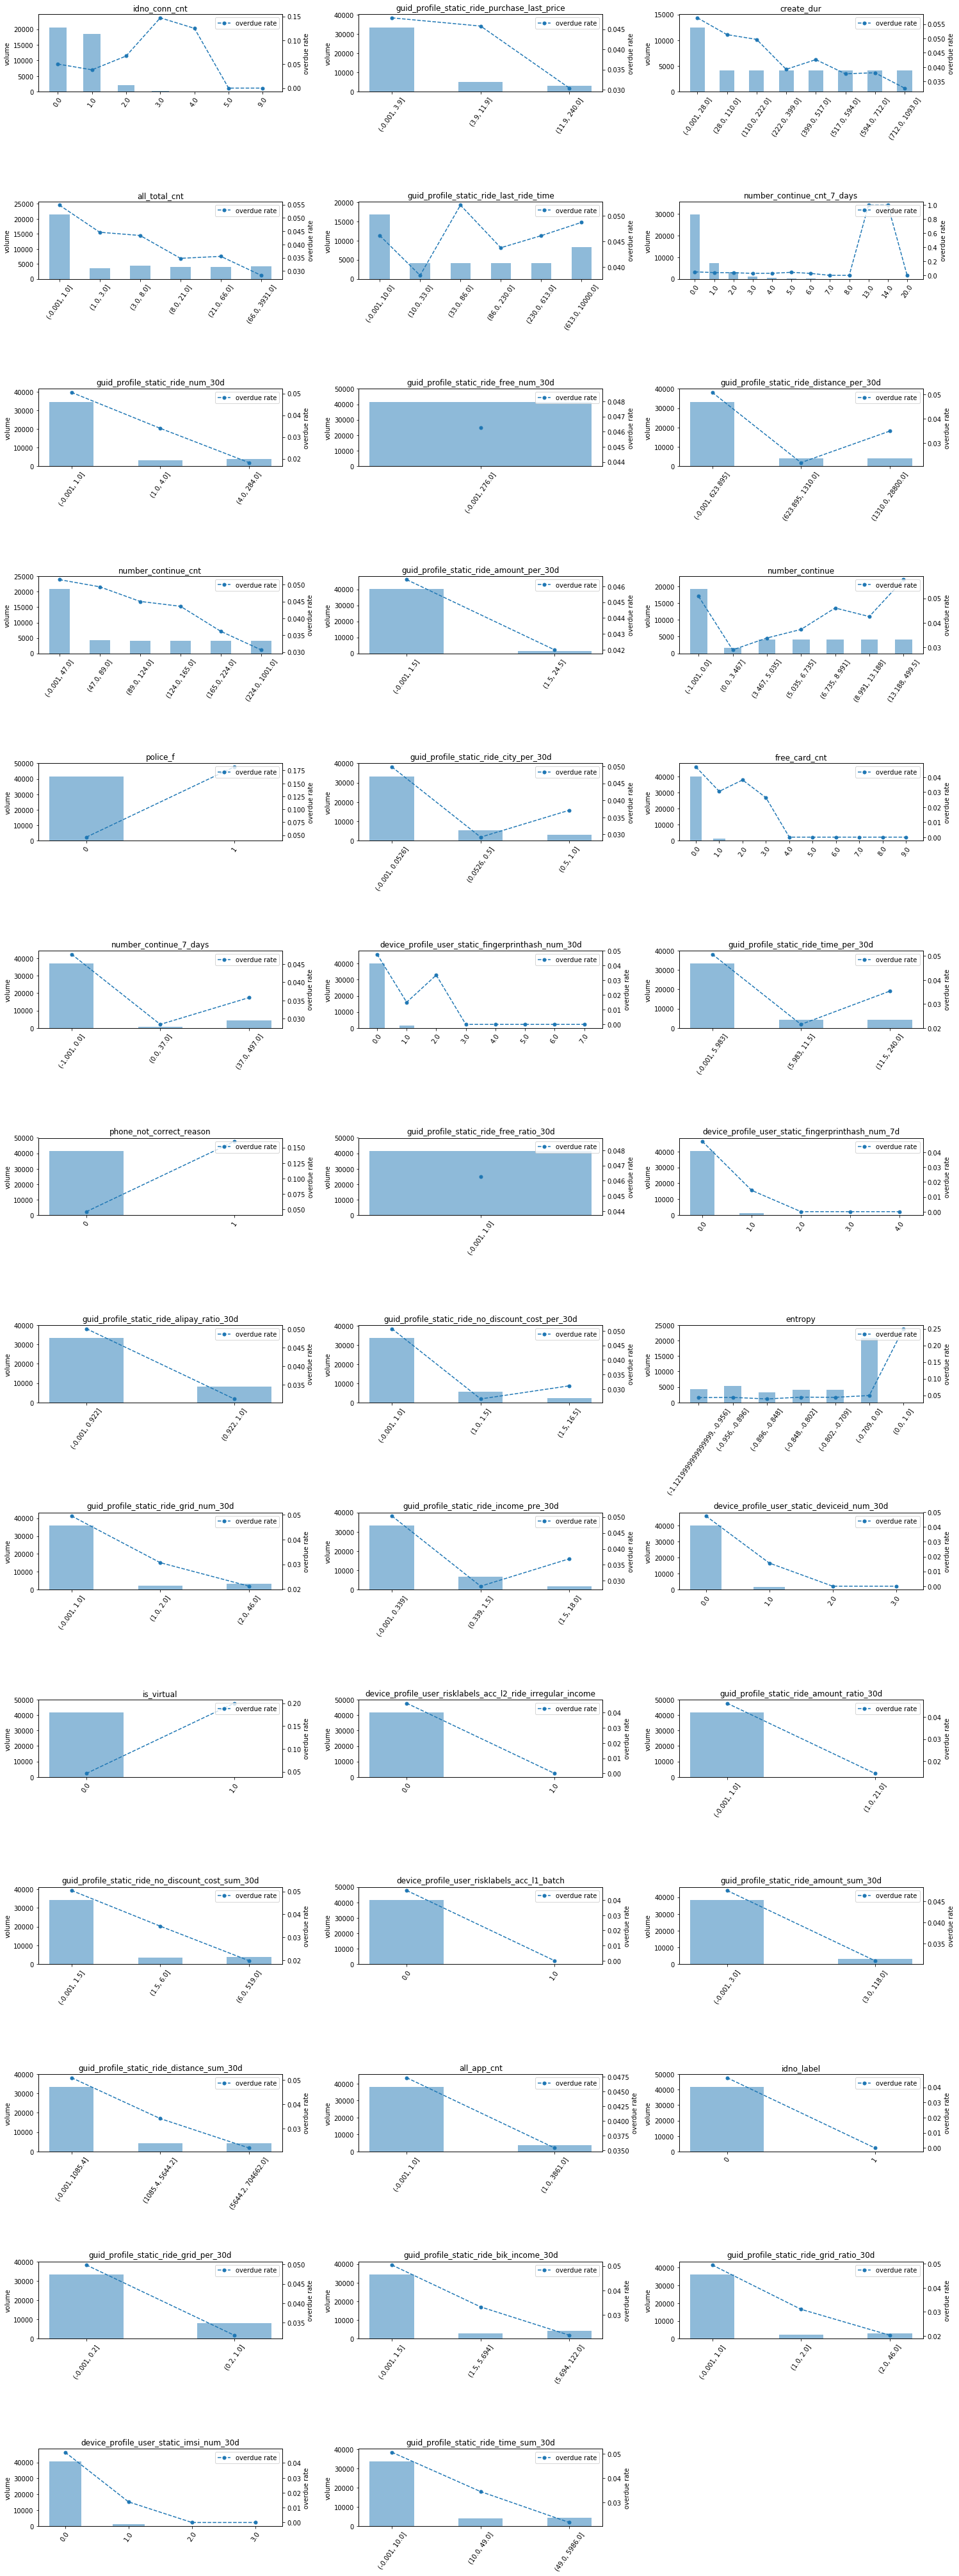

In [3]:
_ = mlearn.reporter.visualize.feature_plot(df, 'd14', save_fig=False, ylim=None)